In [1]:
# import libraries of interest
import pandas as pd
import numpy as np
import seaborn as sns

from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt

%matplotlib inline


# Import the data
This part is a repetition from another notebook!

In [2]:
# import the parsed dblp.xml data set
xml_in = pd.read_csv('/Users/dn186017/OneDrive - Teradata/PMI/Java/pmi2week/UseCase2/DblpParser/output/01titleAuthorVenue.txt', sep = '|', 
                     names = ['publicationTitle','authorId','authorName','venueName','publicationDate','publicationKey'], 
                     encoding='utf-8', low_memory=True)


#/Users/dn186017/OneDrive - Teradata/PMI/Java/pmi2week/UseCase2/DblpParser/output
#'/Users/aj186039/projects/PMI_UseCase/data/DblpParser/01titleAuthorVenue.txt'

xml_in.shape
#(11774650, 4)

/Applications/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(11761959, 6)

In [3]:
xml_in.tail(100)

,publicationTitle,authorId,authorName,venueName,publicationDate,publicationKey
11761859,ROBOSIX UPMC-CFA: RoboCup Team Description.,2052769,Ryad Benosman,RoboCup 2001: Robot Soccer World Cup V,2017-05-26,conf/robocup/BenosmanBBBCCCALPRSVV01
11761860,Localization of Robots in F180 League Using Pr...,2052769,Ryad Benosman,RoboCup 2002: Robot Soccer World Cup VI,2017-05-26,conf/robocup/DouretBBD02
11761861,Real-time visual servoing control of a four-ro...,2052769,Ryad Benosman,9th IFAC Workshop on Adaptation and Learning i...,2017-05-23,conf/alcosp/RomeroSLB07
11761862,Shapes to synchronize camera networks.,2052769,Ryad Benosman,19th International Conference on Pattern Recog...,2017-05-24,conf/icpr/ChangIB08
11761863,Image sampling for localization using entropy.,2052769,Ryad Benosman,19th International Conference on Pattern Recog...,2017-05-24,conf/icpr/LachezeB08
11761864,"Multidirectional stereovision sensor, calibrat...",2052769,Ryad Benosman,13th International Conference on Pattern Recog...,2017-05-24,conf/icpr/BenosmanMD96
11761865,A Multi-Cameras 3D Volumetric Method for Outdo...,2052769,Ryad Benosman,17th International Conference on Pattern Recog...,2017-09-06,conf/icpr/DouretB04
11761866,Panoramic stereo vision sensor.,2052769,Ryad Benosman,Fourteenth International Conference on Pattern...,2017-05-24,conf/icpr/BenosmanD98
11761867,First high speed simultaneous force feedback f...,2052769,Ryad Benosman,IEEE/ASME International Conference on Advanced...,2018-01-11,conf/aimech/NiYPBR14
11761868,Using structures to synchronize cameras of rob...,2052769,Ryad Benosman,2008 IEEE/RSJ International Conference on Inte...,2017-06-15,conf/iros/ChangIB08


In [4]:
# show the last 100 rows of data frame
xml_in.tail(100)

,publicationTitle,authorId,authorName,venueName,publicationDate,publicationKey
11761859,ROBOSIX UPMC-CFA: RoboCup Team Description.,2052769,Ryad Benosman,RoboCup 2001: Robot Soccer World Cup V,2017-05-26,conf/robocup/BenosmanBBBCCCALPRSVV01
11761860,Localization of Robots in F180 League Using Pr...,2052769,Ryad Benosman,RoboCup 2002: Robot Soccer World Cup VI,2017-05-26,conf/robocup/DouretBBD02
11761861,Real-time visual servoing control of a four-ro...,2052769,Ryad Benosman,9th IFAC Workshop on Adaptation and Learning i...,2017-05-23,conf/alcosp/RomeroSLB07
11761862,Shapes to synchronize camera networks.,2052769,Ryad Benosman,19th International Conference on Pattern Recog...,2017-05-24,conf/icpr/ChangIB08
11761863,Image sampling for localization using entropy.,2052769,Ryad Benosman,19th International Conference on Pattern Recog...,2017-05-24,conf/icpr/LachezeB08
11761864,"Multidirectional stereovision sensor, calibrat...",2052769,Ryad Benosman,13th International Conference on Pattern Recog...,2017-05-24,conf/icpr/BenosmanMD96
11761865,A Multi-Cameras 3D Volumetric Method for Outdo...,2052769,Ryad Benosman,17th International Conference on Pattern Recog...,2017-09-06,conf/icpr/DouretB04
11761866,Panoramic stereo vision sensor.,2052769,Ryad Benosman,Fourteenth International Conference on Pattern...,2017-05-24,conf/icpr/BenosmanD98
11761867,First high speed simultaneous force feedback f...,2052769,Ryad Benosman,IEEE/ASME International Conference on Advanced...,2018-01-11,conf/aimech/NiYPBR14
11761868,Using structures to synchronize cameras of rob...,2052769,Ryad Benosman,2008 IEEE/RSJ International Conference on Inte...,2017-06-15,conf/iros/ChangIB08


In [5]:
xml_in.dtypes

publicationTitle    object
authorId            object
authorName          object
venueName           object
publicationDate     object
publicationKey      object
dtype: object

In [6]:
xml_in.dtypes

publicationTitle    object
authorId            object
authorName          object
venueName           object
publicationDate     object
publicationKey      object
dtype: object

In [7]:
# how many unique authors do we have? 2053902
xml_in['authorId'].nunique()

2051685

In [8]:
#drop all rows that have any NaN values
xml_in.dropna(subset = ['venueName'], inplace = True) 

# general observation: NaNs in name_of_conference columns

In [9]:
# how many unique authors do we have NOW? 2013851
xml_in['authorId'].nunique()

2011749

In [10]:
# how many rows, columns do we have now? (11456473, 6)
xml_in.shape

(11444635, 6)

In [11]:
# that many removed 

11761959 - 11444635

317324

# Collect authors for a given publication
This part is a repetition from another notebook!

In [12]:
# group all authors of a given publication into a tuple of authors (because of non-hashable elements)
grouped_authors_by_publication = xml_in.groupby(['publicationKey'], as_index=False)[['authorName', 'authorId']].agg({'authorName': lambda x: tuple(x), 'authorId': lambda x: tuple(x)}) 

In [13]:
# change the name for convenience
grouped_authors_by_publication.rename(columns = {'authorName':'authorNames_in_given_publication'}, inplace = True)
grouped_authors_by_publication.rename(columns = {'authorId':'authorIds_in_given_publication'}, inplace = True)

In [14]:
# show last 5 rows of data frame
grouped_authors_by_publication.tail(20)

,publicationKey,authorNames_in_given_publication,authorIds_in_given_publication
3861304,tr/trier/MI99-12,"(A. Battermann, Ekkehard W. Sachs, E. Arian)","(590057, 685120, 1685554)"
3861305,tr/trier/MI99-13,"(Marco Fahl,)","(1097264,)"
3861306,tr/trier/MI99-14,"(Rainer Tichatschke, Alexander Kaplan)","(455142, 986593)"
3861307,tr/trier/MI99-15,"(Dieter Baum,)","(1273654,)"
3861308,tr/trier/MI99-16,"(Jochen Bern, Christoph Meinel)","(572332, 1540659)"
3861309,tr/trier/MI99-18,"(Dieter Baum,)","(1273654,)"
3861310,tr/trier/MI99-19,"(Harald Sack, Christoph Meinel)","(1073816, 1540659)"
3861311,tr/trier/MI99-20,"(Carsten Damm,)","(477921,)"
3861312,tr/trier/MI99-21,"(Martin Mundhenk,)","(1176663,)"
3861313,tr/trier/MI99-22,"(Martin Mundhenk,)","(1176663,)"


In [15]:
# show data types
grouped_authors_by_publication.dtypes

publicationKey                      object
authorNames_in_given_publication    object
authorIds_in_given_publication      object
dtype: object

In [17]:
len(grouped_authors_by_publication)

count = 0
for i, v in grouped_authors_by_publication.authorIds_in_given_publication.items():
    print(i, v)
    count += 1
    if count > 25:
        break


0 (36430, 40544, 54221, 62966, 62966, 62966, 62966, 63507, 63507, 65249, 70216, 75073, 75581, 75581, 77963, 77963, 77963, 77963, 80883, 100526, 109233, 109233, 121847, 123374, 126117, 128255, 128677, 134384, 134384, 150516, 162583, 165372, 165760, 182622, 199995, '209961', '218120', '220358', 237494, 240974, 242398, 244951, 245610, 258794, 260300, 280708, 282659, 282858, 282858, 284900, 285359, 285359, 302327, 313168, 339957, 347189, 363229, 367182, 374777, 374777, 411897, 424545, 424545, 450453, 457688, 457688, 473423, 474831, 482767, 503947, 504144, 514779, 514779, 514779, 516493, 517327, 540591, 540698, 542086, 543033, 556227, 557809, 564309, 564849, 571604, 574060, 579852, 581248, 581248, 594482, 601600, 601600, 610648, 611748, 612405, 612809, 621849, 625205, 632683, 632908, 634915, 634915, 637254, 646026, 653629, 676078, 683912, 698702, 709117, '726296', '726296', '726296', '726535', '729531', 735697, 740888, 744708, 744708, 744708, 762040, 795788, 802273, 833177, 851668, 864354, 

In [18]:
pubIDs = grouped_authors_by_publication.authorIds_in_given_publication

In [19]:
len(pubIDs)

3861324

In [20]:
pubIDs

0          (36430, 40544, 54221, 62966, 62966, 62966, 629...
1          (107690, 110648, 240974, 264956, 1061350, 1111...
2                        (945799, 1050585, 1278117, 1284526)
3          (185191, 345768, 405757, 488700, 1099119, 1230...
4                                            (65249, 159981)
5          (240974, 260300, 475026, 475026, 475026, 94579...
6                                         (1395762, 1450284)
7          (42233, 596519, 596519, 596519, 596519, 647097...
8          (63481, 96531, 179723, 208072, 233233, 328662,...
9          (1743, 3198, 3825, 5408, 7945, 10540, 13712, 1...
10                                          (883353, 939630)
11                          (62240, 526448, 634993, 1577146)
12                           (9684, 530086, 658982, 1827729)
13                      (1342740, 1644141, 1740850, 1966059)
14                               (1073109, 1376993, 1841925)
15                         (293070, 494286, 816789, 2013372)
16         (37842, 16686

# Data preperation for wide and deep model

In [43]:
#create a list of all authors
fl = [item for sublist in pubIDs for item in sublist]

#clean up the created list
fla = [item if item != "authorId" else -1 for item in fl]

#get only the unique authors and clean up more
unq = np.unique(fla)
unq = [int(i) for i in unq]

#Find out the total number of authors and the ID of the last author
n_authors = len(unq)
maxID = np.amax(unq)
del fl
del fla
del unq

print("Total authors: ", n_authors, ", Maximum ID: ", maxID)



Total authors:  2011740 , Maximum ID:  2052800


In [22]:
n_authors = maxID

In [23]:
#This will be our array containing collaboration experience for mentor-mentee separation
vk = np.zeros([n_authors+1])

In [24]:
pubIDs.tail(20)

3861304             (590057, 685120, 1685554)
3861305                            (1097264,)
3861306                      (455142, 986593)
3861307                            (1273654,)
3861308                     (572332, 1540659)
3861309                            (1273654,)
3861310                    (1073816, 1540659)
3861311                             (477921,)
3861312                            (1176663,)
3861313                            (1176663,)
3861314                     (283485, 1073816)
3861315                             (147497,)
3861316    (317501, 654262, 1176663, 1652903)
3861317                    (1073964, 1176663)
3861318            (283485, 1073816, 1540659)
3861319                     (968958, 1540659)
3861320                     (968958, 2048406)
3861321                             (262477,)
3861322                             (194516,)
3861323     (255565, 472684, 519718, 1185096)
Name: authorIds_in_given_publication, dtype: object

In [ ]:
#Quanify collaboration experience in order to decide who is a mentor and who is a mentee

for paper in tqdm(pubIDs):
    #print(len(paper))
    for author in paper:
        for coauthor in paper:
            vk[int(coauthor)] += 1
        vk[int(author)] -= 1

#in vk, index number corresponds to authorID


#Warning: exception thrown at the very end of execution. This can be ignored.

In [83]:
tmp = sorted(vk)
vka = [i for i in reversed(tmp)]

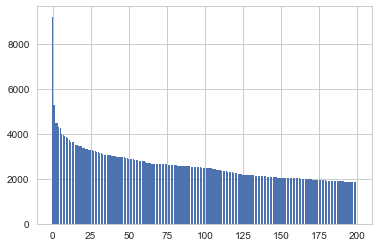

In [85]:
#Plot the number of collaborations for top 200 authors
plt.bar(range(200),vka[:200])
plt.show()

In [ ]:
#This finds all mentor-mentee pairs out of the publications (with all repetitons)

seen = set()

MentorThreshold = 1000
MenteeThreshold = 300
MMPairs = []
for paper in tqdm(pubIDs):

    for author in paper:
        if vk[int(author)] > MentorThreshold:
            MentorID    = int(author)
            
            for coauthor in paper:    
                if vk[int(coauthor)] < MenteeThreshold and vk[int(coauthor)] >= 2: 
                    MenteeID    = int(coauthor)
                    MMPairs.append([MentorID, MenteeID, 0])
                    

                    
#Warning: exception thrown at the very end of execution. This can be ignored.

In [27]:
#This is how many pairs we have in total
len(MMPairs)

713303

In [31]:
#Qantify degree of productive collaboration for mentor-mentee pairs

seen1 = set()
seen2 = set()
seen3 = set()
seen4 = set()
seen5 = set()
seen6 = set()
seenR = set()

clb1 = []
clb2 = []
clb3 = []
clb4 = []
clb5 = []
clb6 = []
clbR = []

cnt = 0

for x in tqdm(MMPairs):
    xx = tuple(x)
    if xx not in seen1:
        clb1.append(x)
        seen1.add(xx)
    elif xx not in seen2:
        clb2.append(x)
        seen2.add(xx)
    elif xx not in seen3:
        clb3.append(x)
        seen3.add(xx)
    elif xx not in seen4:
        clb4.append(x)
        seen4.add(xx)
    elif xx not in seen5:
        clb5.append(x)
        seen5.add(xx)
    elif xx not in seen6:
        clb6.append(x)
        seen6.add(xx) 
    else:
        clbR.append(x)
        seenR.add(xx)
        
        
        
print (len(seen1), len(seen2), len(seen3), len(seen4), len(seen5), len(seen6), len(seenR))
    


317923 111343 60219 40037 29182 22478 17913


In [33]:
#provide category code for each pair

for i in clb1:
    i[2] = 1

for i in clb2:
    i[2] = 2

for i in clb3:
    i[2] = 3

for i in clb4:
    i[2] = 4
    
for i in clb5:
    i[2] = 4      #we pool arrays together into the same category 4 (and 5) 
                  #to obtain larger training sets
        
for i in clb6:
    i[2] = 5

for i in clbR:
    i[2] = 5

In [34]:
clb1[100]

[1033253, 2014631, 1]

In [35]:
#Shuffle the order so that we have a randomized sample

import random
random.shuffle(clb1)
random.shuffle(clb2)
random.shuffle(clb3)
random.shuffle(clb4)
random.shuffle(clb5)
random.shuffle(clb6)
random.shuffle(clbR)


In [36]:
pairsCollabs = np.concatenate((clb1, clb2, clb3, clb4, clb5, clb6, clbR)) #, clb3, clb4, clb5, clb6, clbR)

In [37]:
len(pairsCollabs)
pairsCollabs

array([[ 815874,  358280,       1],
       [ 731144, 1234197,       1],
       [2022172, 1669762,       1],
       ..., 
       [ 326627,  577656,       5],
       [1054181, 1539683,       5],
       [1702233, 1062312,       5]])

In [38]:

count = 0
for x in tqdm(MMPairs):
    print (tuple(x))
    count += 1
    if count > 10:
        break

(1073109, 1376993, 1)
(1073109, 1841925, 1)
(793429, 1695505, 1)
(1480847, 1695505, 1)
(1702073, 1695505, 1)
(1787735, 1695505, 1)
(2052474, 1695505, 1)
(1063056, 974413, 1)
(1063056, 1446703, 1)
(317212, 1958293, 1)
(1000412, 1474854, 1)



# Now one has to run other notebooks that associate author names with authorIDs
These are notebooks pairing1 to pairing4, which distribute the workload across four cores. Only after this is done and the outfile1 to outfile4 are generated, we come back to this notebook and continue with associating the topics to each of the authors:

In [148]:
#Load pickle files with associations
import pickle
#from io import StringIO
assoc_1 = pickle.load(open("/Users/dn186017/OneDrive - Teradata/PMI/Java/pmi2week/UseCase2/DblpParser/output/outfile1.p", "rb"))
assoc_2 = pickle.load(open("/Users/dn186017/OneDrive - Teradata/PMI/Java/pmi2week/UseCase2/DblpParser/output/outfile2.p", "rb"))
assoc_3 = pickle.load(open("/Users/dn186017/OneDrive - Teradata/PMI/Java/pmi2week/UseCase2/DblpParser/output/outfile3.p", "rb"))
assoc_4 = pickle.load(open("/Users/dn186017/OneDrive - Teradata/PMI/Java/pmi2week/UseCase2/DblpParser/output/outfile4.p", "rb"))


In [151]:
#We concatenate the four arrays into one 
assoc = np.concatenate((assoc_1, assoc_2, assoc_3, assoc_4)) 

In [152]:
len(assoc)

2052800

In [157]:
#An example
assoc[1]

412587

In [ ]:
#Load the topic ratings for all authors
#index of assoc corresponds to AuthorID, 
#whereas the value at that index is the location of the Topic profile in the "score by author" (sba)

sba = pickle.load(open("/Users/dn186017/OneDrive - Teradata/PMI/Java/pmi2week/UseCase2/DblpParser/output/score_by_author_by_document.p", "rb"))


In [161]:
#Print example topics profile

authorID = 0
sba[assoc[authorID]]

array([ 0.        ,  0.45082876,  0.        ,  0.        ,  0.        ,
        0.25060296,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.0612896 ,  0.        ,  0.18316104,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [200]:
len(pairsCollabs)

713303

In [201]:
#Generate training data

#Number of samples per category
n_samp = 40000

sample_cnt = np.zeros(5)

TrainData = []
for pair in pairsCollabs:
    MentorID  = pair[0]
    MenteeID  = pair[1]
    collabInt = pair[2]
    
    if assoc[MentorID] != -1 and assoc[MenteeID] != -1:
        if sample_cnt[collabInt-1] < n_samp:
            sample_cnt[collabInt-1] += 1
            TrainData.append(np.concatenate((sba[assoc[MentorID]], sba[assoc[MenteeID]], [collabInt])))   
        
        


In [203]:
import random
random.shuffle(TrainData)

In [204]:
len(TrainData)


200000

In [205]:
TrainData[0:10]

[array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.77795422,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.11537908,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.24039726,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [206]:
#convert to a dataframe

TrainDF = pd.DataFrame(TrainData)

TrainDF

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.000000,0.000000,0.000000,0.000000,0.777954,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.209894,0.000000,0.000000,0.000000,5.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.265267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012204,0.000000,0.000000,4.0
3,0.000000,0.000000,0.000000,0.000000,0.750347,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.682589,0.000000,0.000000,0.000000,0.000000,0.000000,0.186601,0.000000,1.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.063924,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
7,0.520274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
8,0.086330,0.000000,0.000000,0.000000,0.000000,0.059739,0.227805,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111322,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0


In [207]:
#Save into a pickle file

import pickle

with open('/Users/dn186017/OneDrive - Teradata/PMI/Java/pmi2week/UseCase2/DblpParser/output/MentorMenteeDNNTrainData.p', 'wb') as fp:
    pickle.dump(TrainDF, fp)

In [209]:
#Test whether the pickle file can be properly read

testReadIn = pickle.load(open("/Users/dn186017/OneDrive - Teradata/PMI/Java/pmi2week/UseCase2/DblpParser/output/MentorMenteeDNNTrainData.p", "rb"))

len(testReadIn)

200000